In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [21]:
# load the dataset
data = pd.read_csv("D:\\Data\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


C:\Users\DELL\TejaswiniAnaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


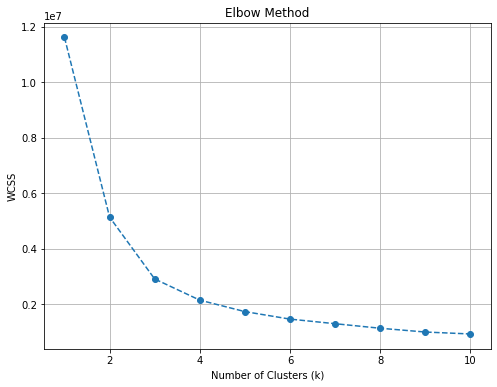

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("D:\\Data\\diabetes.csv")

# Assuming you want to use certain columns for clustering, you can select those columns
# For example, let's say you want to use columns "Feature1" and "Feature2"
selected_features = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]]

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Try different values of k (number of clusters) and compute WCSS for each k
for i in range(1, 11):  # You can choose a different range if needed
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_features)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS value

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
means = data.mean()
stds = data.std()

In [25]:
stds

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [26]:
 import numpy as np
import pandas as pd


mean_pl = np.mean(data["Insulin"])
std_deviation_pl = np.std(data["Insulin"])

standardized_values_pl = (data["Insulin"] - mean_pl) / std_deviation_pl

# Print the standardized values
print("Standardized Values:")
print(standardized_values_pl)


Standardized Values:
0     -0.692891
1     -0.692891
2     -0.692891
3      0.123302
4      0.765836
         ...   
763    0.870031
764   -0.692891
765    0.279594
766   -0.692891
767   -0.692891
Name: Insulin, Length: 768, dtype: float64


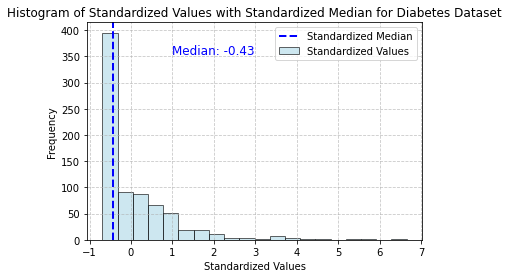

In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Create a histogram for the standardized values

median_pl = np.median(data["Insulin"])
standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl
plt.hist(standardized_values_pl, bins=20, alpha=0.6, color='lightblue', label='Standardized Values', edgecolor='black')

plt.axvline(standardized_median_pl, color='blue', linestyle='dashed', linewidth=2, label='Standardized Median')
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Values with Standardized Median for Diabetes Dataset')

plt.legend()
plt.text(plt.xlim()[0] + 2.05, plt.ylim()[1] * 0.9, f'Median: {(standardized_median_pl):.2f}', color='blue', ha='left', va='top', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [28]:

left_mask = standardized_values_pl <= standardized_median_pl
left_selected_values = data["Insulin"][left_mask]

right_mask = standardized_values_pl > standardized_median_pl
right_selected_values = data["Insulin"][right_mask]

print("Left Selected Values:")
print(left_selected_values)
print("Right Selected Values:")
print(right_selected_values)


Left Selected Values:
0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 384, dtype: int64
Right Selected Values:
3       94
4      168
6       88
8      543
13     846
      ... 
751     74
753    510
755    110
763    180
765    112
Name: Insulin, Length: 384, dtype: int64


In [29]:

left_diff = np.abs(left_selected_values - median_pl)
right_diff = np.abs(right_selected_values - median_pl)

left_sorted = left_selected_values.reset_index(drop=True)[np.argsort(left_diff)]
right_sorted = right_selected_values.reset_index(drop=True)[np.argsort(right_diff)]


num_values = len(left_selected_values)
left_75_percent = left_sorted[:int(0.85 * num_values)]
right_75_percent = right_sorted[:int(0.85 * num_values)]

print("Left 75%:")
print(left_75_percent)
print("Right 75%:")
print(right_75_percent)
print(len(right_75_percent))
print(len(left_75_percent))

selected_left_rows = data.loc[left_75_percent.index]
selected_right_rows = data.loc[right_75_percent.index]

# Print the selected rows
print("Selected Left Rows:")
print(selected_left_rows)
print("Selected Right Rows:")
print(selected_right_rows)

Left 75%:
164    29
294    25
96     23
30     23
352    22
       ..
184     0
183     0
170     0
182     0
180     0
Name: Insulin, Length: 326, dtype: int64
Right 75%:
107     32
21      36
47      36
236     36
50      37
      ... 
9      235
231    237
342    240
19     240
14     245
Name: Insulin, Length: 326, dtype: int64
326
326
Selected Left Rows:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
164            0      131             88              0        0  31.6   
294            0      161             50              0        0  21.9   
96             2       92             62             28        0  31.6   
30             5      109             75             26        0  36.0   
352            3       61             82             28        0  34.4   
..           ...      ...            ...            ...      ...   ...   
184            4      141             74              0        0  27.6   
183            5       73             60      

In [30]:
combined_dataset = pd.concat([selected_left_rows, selected_right_rows], axis=0)

print("Combined Dataset:")
print(combined_dataset)

Combined Dataset:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
164            0      131             88              0        0  31.6   
294            0      161             50              0        0  21.9   
96             2       92             62             28        0  31.6   
30             5      109             75             26        0  36.0   
352            3       61             82             28        0  34.4   
..           ...      ...            ...            ...      ...   ...   
9              8      125             96              0        0   0.0   
231            6      134             80             37      370  46.2   
342            1        0             68             35        0  32.0   
19             1      115             70             30       96  34.6   
14             5      166             72             19      175  25.8   

     DiabetesPedigreeFunction  Age  Outcome  
164                     0.743   32        1  
2

In [31]:
combined_dataset_without_variety = combined_dataset.drop(columns=["Outcome"])

# Print the modified dataset
print("Combined Dataset without 'variety' column:")
print(combined_dataset_without_variety)

Combined Dataset without 'variety' column:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
164            0      131             88              0        0  31.6   
294            0      161             50              0        0  21.9   
96             2       92             62             28        0  31.6   
30             5      109             75             26        0  36.0   
352            3       61             82             28        0  34.4   
..           ...      ...            ...            ...      ...   ...   
9              8      125             96              0        0   0.0   
231            6      134             80             37      370  46.2   
342            1        0             68             35        0  32.0   
19             1      115             70             30       96  34.6   
14             5      166             72             19      175  25.8   

     DiabetesPedigreeFunction  Age  
164                     0.743  

In [32]:
combined_dataset_without_variety=combined_dataset_without_variety.drop(columns=["DiabetesPedigreeFunction"])


In [33]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 2

kmeans = KMeans(n_clusters=k, random_state=0)

kmeans.fit(combined_dataset_without_variety)
clusters = kmeans.predict(combined_dataset_without_variety)
silhouette_avg = silhouette_score(combined_dataset_without_variety, clusters)
print("Silhouette Score for {} clusters: {:.2f}".format(k, silhouette_avg))
print("Cluster Labels:", clusters)


Silhouette Score for 2 clusters: 0.61
Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

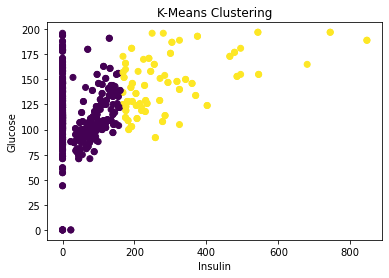

In [35]:
# Access columns by their names
feature1 = combined_dataset_without_variety['Insulin']
feature2 = combined_dataset_without_variety['Glucose']

# Create a scatter plot
plt.scatter(feature1, feature2, c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()

# Create a scatter plot

In [ ]:
# K MEANS DIABETES

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [37]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.read_csv("D:\\Data\\diabetes.csv")

# Drop the "Outcome" column
data = data.drop(columns=["Outcome"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Define a range of k values for K-Means
k_values = range(2, 11)

# Initialize variables to store outlier counts and silhouette scores
outlier_counts = []
silhouette_scores = []

# Perform K-Means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Detect and count outliers using the Mahalanobis distance method
    cluster_centers = kmeans.cluster_centers_
    mahalanobis_distances = np.sqrt(np.sum(((scaled_data - cluster_centers[cluster_labels]) ** 2), axis=1))
    threshold = np.percentile(mahalanobis_distances, 85)  # Define a threshold for outliers (e.g., 95th percentile)
    outliers = np.where(mahalanobis_distances > threshold)[0]
    outlier_counts.append(len(outliers))
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Print the number of outliers deleted for each k
for k, outliers_deleted in zip(k_values, outlier_counts):
    print(f'Number of outliers deleted for k={k}: {outliers_deleted}')

# Print the silhouette scores for each k
for k, silhouette_avg in zip(k_values, silhouette_scores):
    print(f'Silhouette score for k={k}: {silhouette_avg}')


Number of outliers deleted for k=2: 116
Number of outliers deleted for k=3: 116
Number of outliers deleted for k=4: 116
Number of outliers deleted for k=5: 116
Number of outliers deleted for k=6: 116
Number of outliers deleted for k=7: 116
Number of outliers deleted for k=8: 116
Number of outliers deleted for k=9: 116
Number of outliers deleted for k=10: 116
Silhouette score for k=2: 0.1956540901138544
Silhouette score for k=3: 0.17954310409084448
Silhouette score for k=4: 0.19445228353012212
Silhouette score for k=5: 0.16409270998945927
Silhouette score for k=6: 0.1688296160416177
Silhouette score for k=7: 0.1696266555507008
Silhouette score for k=8: 0.1617625301829036
Silhouette score for k=9: 0.1655890769386893
Silhouette score for k=10: 0.1630492369096289
